In [1]:
import numpy as np

# Function to load data from a binary file
def load_data_bin(filename, dimensions, precision, lim):
    dtype_map = {
        'double': np.float64,
        'single': np.float32,
        'int': np.int32
    }
    dtype = dtype_map.get(precision, np.float64)  # Default to np.float64 if precision not recognized
    data = np.fromfile(filename, dtype=dtype).reshape(dimensions, order='F')  # MATLAB uses column-major order, hence 'F'
    
    # Assuming LIM is used for some form of data scaling or selection, which might need more context to properly implement in Python
    # For now, just returning the loaded data and the grid based on the dimensions and lim values
    n1, n2, n3 = dimensions
    x1 = np.linspace(lim[0], lim[1], n1)
    x2 = np.linspace(lim[2], lim[3], n2)
    x3 = np.linspace(lim[4], lim[5], n3)
    
    return data, x1, x2, x3

# Parameters
dim = (330, 260, 280)  # (n1, n2, n3)
precision = 'double'
lim = [-235, 235, -185, 185, 0, 400]  # [xmin, xmax, ymin, ymax, zmin, zmax]

# Load the data
b1, x1, x2, x3 = load_data_bin('/run/media/max/Data/Simulations/Plasma/solar_prominence/B1.bin', dim, precision, lim)
b2, _, _, _ = load_data_bin('/run/media/max/Data/Simulations/Plasma/solar_prominence/B2.bin', dim, precision, lim)
b3, _, _, _ = load_data_bin('/run/media/max/Data/Simulations/Plasma/solar_prominence/B3.bin', dim, precision, lim)

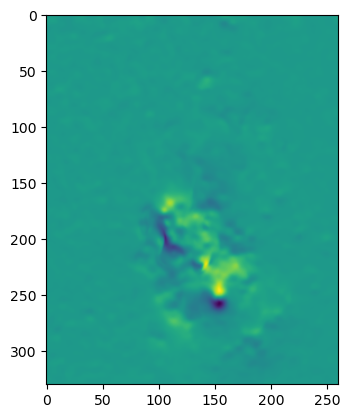

In [2]:
import matplotlib.pyplot as plt
plt.imshow(b1[:, :, 0])

In [10]:
from maxpy.utils import save_as_vti

origin = [x1[0], x2[0], x3[0]]
spacing = [x1[1] - x1[0], x2[1] - x2[0], x3[1] - x3[0]]

magnetic_field = np.array([b1, b2, b3])
save_as_vti(magnetic_field, None, origin, spacing, '/run/media/max/Data/Simulations/Plasma/solar_prominence/', 'magnetic_field')